###                                                                                                                                              classification notebook
**Present by:   Daniel kula**

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import csv
from sklearn.svm import SVC
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from matplotlib import style
style.use("ggplot")


In [2]:
df =pd.read_csv(r"C:\Users\user\Desktop\דניאל\דניאל לימודים\אוניברסיטה\עבודת גמר\classification-diabetes.csv")
df.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
163,2,100,64,23,0,29.7,0.368,21,0
177,0,129,110,46,130,67.1,0.319,26,1
286,5,155,84,44,545,38.7,0.619,34,0
723,5,117,86,30,105,39.1,0.251,42,0
398,3,82,70,0,0,21.1,0.389,25,0
762,9,89,62,0,0,22.5,0.142,33,0
524,3,125,58,0,0,31.6,0.151,24,0
531,0,107,76,0,0,45.3,0.686,24,0
416,1,97,68,21,0,27.2,1.095,22,0
165,6,104,74,18,156,29.9,0.722,41,1


**part 1: KNN**

In [8]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [9]:
# cross validation
k_range = list(range(1, 692))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.6510594668489406


Text(0.5, 1.0, '1st graph KNN')

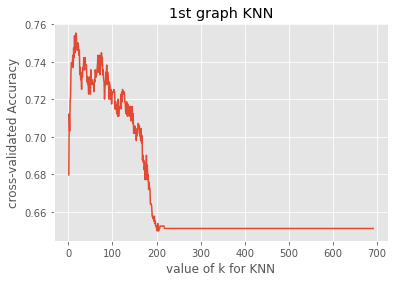

In [10]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('1st graph KNN')

In [11]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7552973342447027


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
y_pred_class = logreg.predict(X_test)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred_class))

Confusion matrix
[[115  15]
 [ 25  37]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


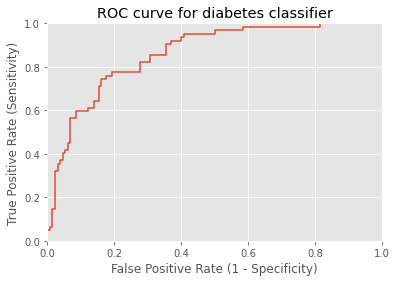

In [13]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

###  As we see the model is unstable and we need to add, reduce or change values to get more accuracy 

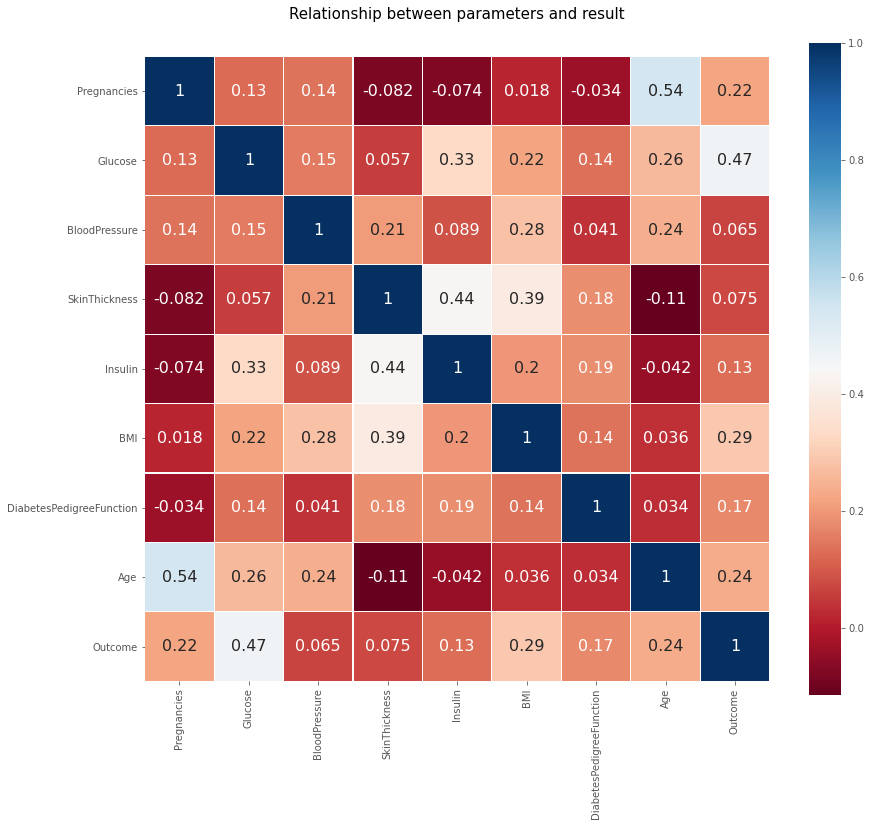

In [16]:

heatmap_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Relationship between parameters and result', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

### We added a heat map showing parameters that have less effect on the outcome

feature_cols2 = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X2 = df[feature_cols2]
y2 = df.Outcome
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
X2_test.head()

### I decided to drop off the "Blood Pressure" parameter because it has the least effect on the outcome.

In [18]:
k_range2 = list(range(1, 692))
k_scores2 = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn2, X2, y2, cv=10, scoring='accuracy')
    k_scores2.append(scores2.mean())

In [19]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X2, y2, cv=10, scoring='accuracy').mean())

0.7331168831168832


Text(0.5, 1.0, '2nd graph KNN')

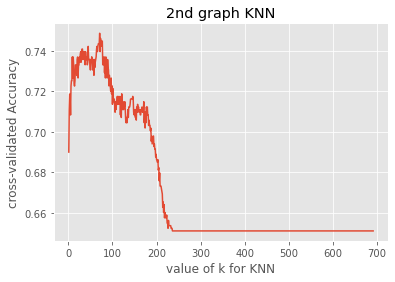

In [20]:
%matplotlib inline

plt.plot(k_range2, k_scores2)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('2nd graph KNN')

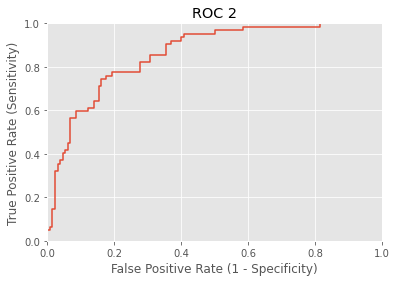

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC 2')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### The graph becomes more stable but maybe it has nor the best accuracy 

In [22]:
feature_cols3 = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X3 = df[feature_cols3]
y3 = df.Outcome
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=0)

### I decided to drop off the 'skin thickness' parameter because it has the least effect on the result

In [23]:
k_range3 = list(range(1, 692))
k_scores3 = []
for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores3 = cross_val_score(knn3, X3, y3, cv=10, scoring='accuracy')
    k_scores3.append(scores3.mean())

In [24]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X3, y3, cv=10, scoring='accuracy').mean())

0.7409945317840055


Text(0.5, 1.0, '3rd graph KNN')

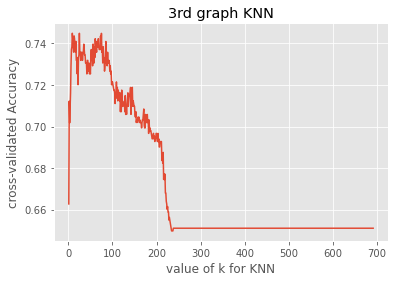

In [25]:
%matplotlib inline

plt.plot(k_range3, k_scores3)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('3rd graph KNN')

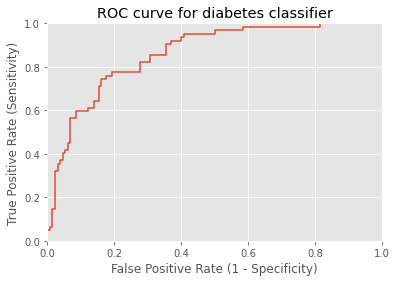

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### As you can see the graph has become more stable

<function matplotlib.pyplot.show(*args, **kw)>

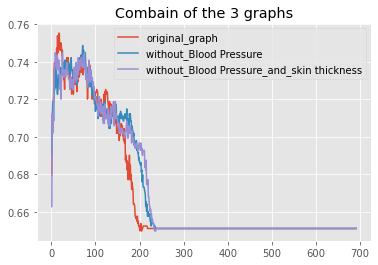

In [27]:
plt.plot(k_range, k_scores, label = "original_graph")
plt.plot(k_range2, k_scores2, label = "without_Blood Pressure")
plt.plot(k_range3, k_scores3, label = "without_Blood Pressure_and_skin thickness")
plt.title('Combain of the 3 graphs')
plt.legend()
plt.show

### Here we see that the highest level of accuracy is in the red line (in the original model). 
### But the red line deals with less accuracy with more samples than the blue and purple.  if we are looking for the best model witpurple one. 

In [29]:
listi = list(range(1, 51))
k_range = listi
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
k_range2 = listi
k_scores2 = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn2, X2, y2, cv=10, scoring='accuracy')
    k_scores2.append(scores2.mean())
k_range3 = listi
k_scores3 = []
for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores3 = cross_val_score(knn3, X3, y3, cv=10, scoring='accuracy')
    k_scores3.append(scores3.mean())

<function matplotlib.pyplot.show(*args, **kw)>

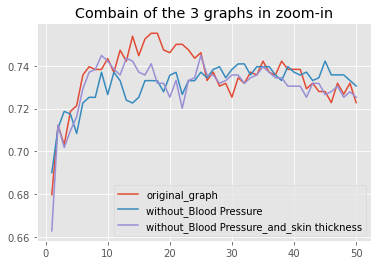

In [30]:
plt.plot(k_range, k_scores, label = "original_graph")
plt.plot(k_range2, k_scores2, label = "without_Blood Pressure")
plt.plot(k_range3, k_scores3, label = "without_Blood Pressure_and_skin thickness")
plt.title('Combain of the 3 graphs in zoom-in')
plt.legend()
plt.show

### Same graph, up close

# part 2: linear regression and svc

(576, 1)

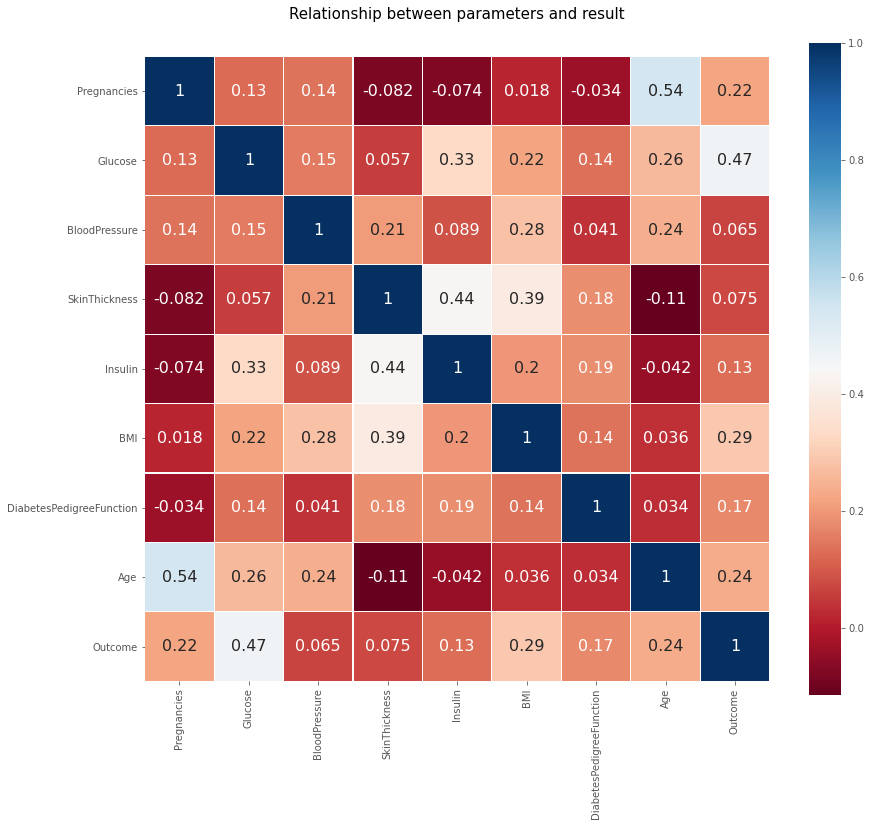

In [31]:
feature_cols = ['Glucose']
x=df[feature_cols]
x_train, x_test = train_test_split(x, random_state=0)


heatmap_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Relationship between parameters and result', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data
x_train.shape

###  As we see the model divides the graph into 2 and looks like this

In [32]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X)
y_probi=clf.predict_proba(X)
clf.score(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7825520833333334

### We have no option to increase the accuracy because there are no parameters to delete

<function matplotlib.pyplot.show(*args, **kw)>

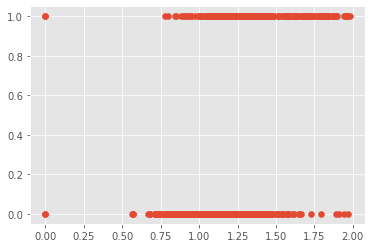

In [33]:
x_train=(x_train/100)
plt.scatter(x_train,y_train)
plt.show


array([1, 1], dtype=int64)

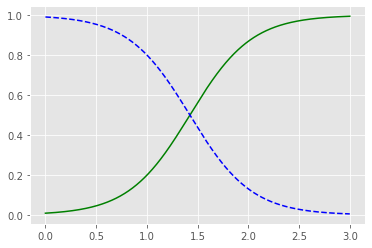

In [34]:
list(df.keys())
X = x_train
y = y_train
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
log_reg.predict([[1.7], [1.5]])



In [36]:
logreg = LogisticRegression()
logreg.fit(X_test, y_pred_class )
y_pred_class = logreg.predict(X_test)
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 40  22]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
